#**Lab 4 : CLUSTERING Part 1**

In this Lab you will have to write code for 2 clustering algorithms based on the mathematical theory :

1. K-means Clustering
2. Gaussian Mixture Model

You will then have to use these algorithms on a pratical dataset and compare the results with the inbuilt algorithms present in scikit learn toolkit

**Please use plots wherever possible to demonstrate the results**

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# K-means Clustering

K-means clustering is a type of unsupervised learning, which is used when you have unlabeled data (i.e., data without defined categories or groups). The goal of this algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of K groups based on the features that are provided. 



**Step 1 : Data Generation** 

Generate 2D gaussian data of 4 types each having 100 points, by taking appropriate mean and varince (example: mean :(0.5 0) (5 5) (5 1) (10 1.5), variance : Identity matrix)

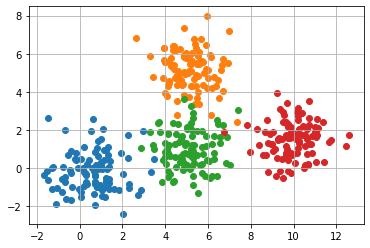

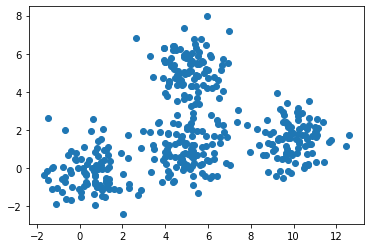

In [13]:
# write your code here
d1 = np.random.multivariate_normal((0.5, 0.0), np.identity(2), 100)
d2 = np.random.multivariate_normal((5.0, 5.0), np.identity(2), 100)
d3 = np.random.multivariate_normal((5.0, 1.0), np.identity(2), 100)
d4 = np.random.multivariate_normal((10.0, 1.5), np.identity(2), 100)
ax1 = plt.figure()
plt.grid()
# print(d1)
plt.scatter(d1[:,0], d1[:,1])
plt.scatter(d2[:,0], d2[:,1])
plt.scatter(d3[:,0], d3[:,1])
plt.scatter(d4[:,0], d4[:,1])

zeroarr = np.zeros(100)
onearr = np.ones(100)
twoarr = 2*onearr
threearr = 3*onearr
real_labels = np.concatenate((zeroarr, onearr, twoarr, threearr))
# print(real_labels)
# concatenate all this to form an unlabelled dataset
full_dist = np.concatenate((d1,d2,d3,d4))
ax2 = plt.figure()
plt.scatter(full_dist[:,0], full_dist[:,1])


**Step 2 : Cluster Initialisation**

Initialse K number of Clusters (Here, K=4)

[[ 5.89328283  1.68993957]
 [ 4.85592148  0.043958  ]
 [11.11238799  2.55492499]
 [ 9.0099041   1.2459234 ]]
(4, 2)


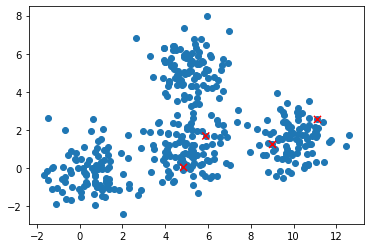

In [14]:
# write your code here
K = 4
centroids = full_dist[np.random.choice(len(full_dist), size=K, replace=False)]
print(centroids)
plt.scatter(full_dist[:,0], full_dist[:,1])
plt.scatter(centroids[:,0], centroids[:,1], marker='x', color='r', s=50*np.ones(len(centroids)))
print(centroids.shape)

**Step 3 : Cluster assignment and re-estimation Stage**

a) Using initial/estimated cluster centers (mean $\mu_{i}$) perform cluster assignment.

b) Assigned cluster for each feature vector ($X_{j}$) can be written as:
$$arg \min_{i} ||C_{i}-X_{j}||^{2},~1 \leq i \leq K,~1\leq j \leq N$$ 
c) Re-estimation: After cluster assignment, the mean vector is recomputed as,
$$\mu_{i}=\frac{1}{N_{i}}\sum_{j \in i^{th} cluster}X_{j}$$
where $N_{i}$ represents the number of datapoints in the $i^{th}$ cluster.

d) Objective function (to be minimized):
$$Error(\mu)=\frac{1}{N}\sum_{i=1}^{K}\sum_{j \in i^{th} cluster}||C_{i}-X_{j}||^{2}$$

________________________________________________________________________________________
Iteration  0
error =  3.8816832899173517


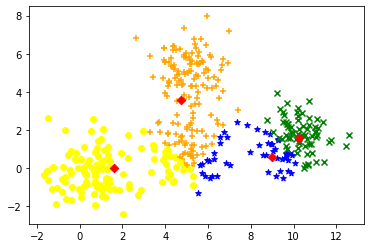

________________________________________________________________________________________
Iteration  1
error =  3.4843493473044096


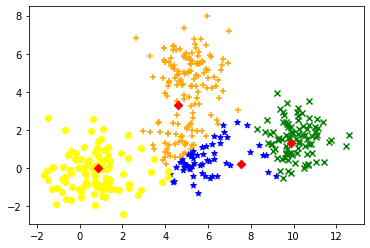

________________________________________________________________________________________
Iteration  2
error =  2.8246287414001183


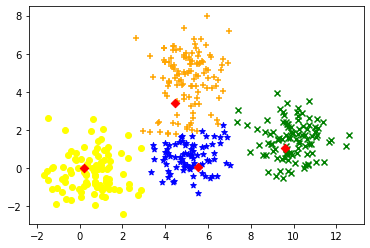

________________________________________________________________________________________
Iteration  3
error =  2.4513979809495736


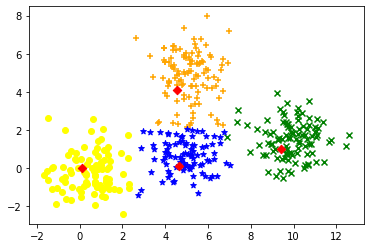

________________________________________________________________________________________
Iteration  4
error =  2.3801051411872653


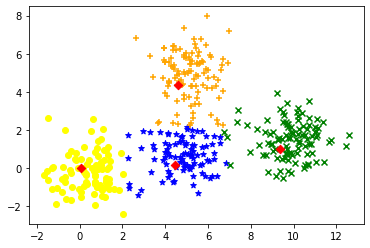

________________________________________________________________________________________
Iteration  5
error =  2.4172876475088656


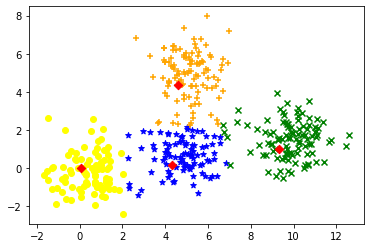

________________________________________________________________________________________
Iteration  6
error =  2.420336126470885


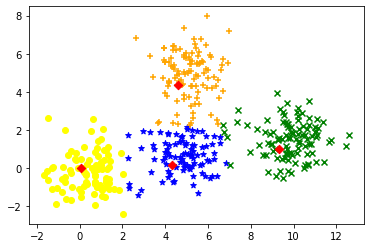

________________________________________________________________________________________
Iteration  7
error =  2.420336126470885


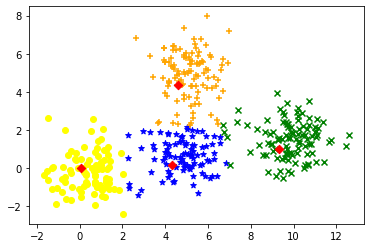

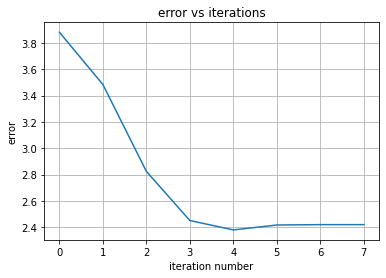

In [15]:
# write your code here

Runs = 50
# distance func
# import sys

def dist(a, b):
    d = (a[1] - b[1])**2 + (a[0] - b[0])**2
    return d

# func to find nearest centroid to some point x
def find_nearest_centroid_to(x, centroids):
    distance = dist(x, centroids[0,:])
    # distance = sys.maxsize
    # nearest_centroid = [0, 0]
    nearest_c_index = 0
    for i in range(K):
        # print(centroids[i,:])
        newdist = dist(x, centroids[i,:])
        if newdist < distance:
            distance = newdist
            # nearest_centroid = centroids[i,:]
            nearest_c_index = i
    return nearest_c_index

M = len(full_dist)
# cluster_matrix = np.zeros((M, K)) # here, a 400 x 4 matrix

i = 0
# np.random.shuffle(full_dist)
centroid_list = []
# print(centroids)
# print(centroids.shape)
for x in full_dist:
    y = find_nearest_centroid_to(x, centroids)
    centroid_list.append(y)
    # cluster_matrix[i,y] = 1
    # i = i + 1
# print(cluster_matrix)
# print(centroid_list)
initial_setting = np.column_stack((full_dist, centroid_list))
# print(initial_setting)

color_list = ['orange', 'yellow', 'green', 'blue']
marker_list = ['+', 'o', 'x', '*']
# color of kth cluster will be kth in the list
def recalc_means(setting):
    mean0 = np.array([0, 0])
    mean1 = np.array([0, 0])
    mean2 = np.array([0, 0])
    mean3 = np.array([0, 0])
    count0 = 0
    count1 = 0
    count2 = 0
    count3 = 0
    for pt in setting:
        # print(pt)
        if pt[2] == 0:
            mean0[0] += pt[0]
            mean0[1] += pt[1]
            count0 += 1
        elif pt[2] == 1:
            mean1[0] += pt[0]
            mean1[1] += pt[1]
            count1 += 1
        elif pt[2] == 2:
            mean2[0] += pt[0]
            mean2[1] += pt[1]
            count2 += 1
        elif pt[2] == 3:
            mean3[0] += pt[0]
            mean3[1] += pt[1]
            count3 += 1
    # print(mean0, " ", mean1, " ", mean2, " ", mean3)
    mean0 = mean0/count0
    mean1 = mean1/count1
    mean2 = mean2/count2
    mean3 = mean3/count3
    allmean = np.vstack((mean0, mean1, mean2, mean3))

    return allmean
    # print(mean0, " ", mean1, " ", mean2, " ", mean3)

def error(state):
    total_c = 0
    for x in state:
        d = dist(x[0:2], centroids[int(x[2])])
        total_c += d
    total_c /= 400
    return total_c

curr_state = initial_setting
thres = 10**(-10)
error_arr = []
ctr = []
prev_error = 100
for i in range(20):
    print("________________________________________________________________________________________")
    print("Iteration ", i)
    # recalc centroids
    centroids = recalc_means(curr_state)
    # j = 0
    # reassign to new centroids
    j = 0
    for x in curr_state:
        y = find_nearest_centroid_to(x, centroids)
        x[2] = y
        curr_state[j,2] = y
        j = j + 1
    curr_error = error(curr_state)
    print("error = ", curr_error)
    plt.figure()
    for x in curr_state:
        plt.scatter(x[0], x[1], marker=marker_list[int(x[2])], color=color_list[int(x[2])])
    plt.scatter(centroids[:,0], centroids[:,1], marker='D', color='red')
    plt.show()
    error_arr.append(curr_error)
    ctr.append(i)
    if(np.abs(curr_error - prev_error) < thres):
        break
    prev_error = curr_error
plt.figure()
plt.grid()
plt.xlabel("iteration number")
plt.ylabel("error")
plt.title("error vs iterations")
plt.plot(ctr, error_arr)
plt.show()


In [16]:
# --------------------------- testing for one point : ---------------------------------------------       
# x = full_dist[np.random.choice(len(full_dist), size=1)]
# x = x[0]
# print(x)
# c = find_nearest_centroid_to(x)
# print(c)

# plt.scatter(full_dist[:,0], full_dist[:,1])
# plt.scatter(centroids[:,0], centroids[:,1], marker='x', color='r', s=50*np.ones(len(centroids)))
# plt.scatter(x[0], x[1], marker='x', color='black')
# plt.scatter(c[0], c[1], marker='+', color='lime')

**Step 4 : Performance metric**

Compute Homogeneity score and Silhouette coefficient using the information given below 

Homogeneity score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Silhouette coeeficient : 

$a(x)$ : Average distance of x to all other vectors in same cluster

$b(x)$ : Average distance of x to the vectors in other clusters. Find minimum among the clusters

$s(x)$ = $\frac{b(x) - a(x)}{max(a(x),b(x))}$

Silhouette coefficient (SC) : 

$$ SC =  \frac{1}{N}\sum_{i=1}^{N}s(x) $$

In [17]:
# write your code here
from sklearn.metrics import homogeneity_score
pred_labels = curr_state[:,-1]
# real_labels = initial_setting[:,-1]
h = homogeneity_score(real_labels, pred_labels)
print(h)


0.8373471911844412


# Gaussian Mixture Models Clustering

Gaussian mixture model is an unsupervised machine learning method. It summarizes a multivariate probability density function with a mixture of Gaussian probability distributions as its name suggests. It can be used for data clustering and data mining. In this lab, GMM is used for clustering.

**Step 1:  Data generation**

a) Follow the same steps as in K-means Clustering to generate the data

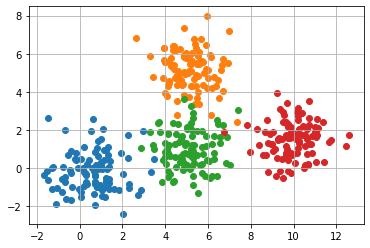

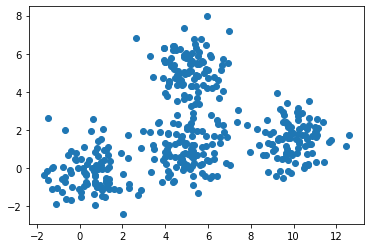

In [18]:
# write your code here
# later on, we need to compare GMM and k-means, so let's just use the same dataset initially itself.
# this is way more efficient (in terms of the assignment)

full_dist = np.concatenate((d1,d2,d3,d4))
ax1 = plt.figure()
plt.grid()
plt.scatter(d1[:,0], d1[:,1])
plt.scatter(d2[:,0], d2[:,1])
plt.scatter(d3[:,0], d3[:,1])
plt.scatter(d4[:,0], d4[:,1])

# print(real_labels)
# concatenate all this to form an unlabelled dataset
full_dist = np.concatenate((d1,d2,d3,d4))
ax2 = plt.figure()
plt.scatter(full_dist[:,0], full_dist[:,1])

**Step 2. Initialization**

a) Mean vector (randomly any from the given data points) ($\mu_{k}$)

b) Covariance (initialize with (identity matrix)*max(data))  ($\Sigma_{k}$)

c) Weights (uniformly) ($w_{k}$), 
with constraint: $\sum_{k=1}^{K}w_{k}=1$

In [19]:
def initialization(data, K):
    theta = []
    M = data.shape[0]
    N = data.shape[1]
    randmeans = np.random.randint(0, M, K) # picks k values from {0, 1, ..., M-1}
    means = data[randmeans, :]
    means = means.reshape(-1, 1)
    theta.append(means)
    covariance = np.zeros((N, N, K))
    for i in range(K):
        covariance[:,:,i] = np.identity(N) * np.max(data, axis=None)
    theta.append(covariance)
    weights = np.ones((K,1))/K
    theta.append(weights)
    # print(means)
    return theta

**Step 3: Expectation stage**

$$\gamma_{ik}=\frac{w_{k}P(x_{i}|\mu_{k},\Sigma_{k})}{\sum_{k=1}^{K}w_{k}P(x_{i}|\mu_{k},\Sigma_{k})}$$

where,

$$\theta_{k}=\{\mu_{k},\Sigma_{k},w_{k}\}$$
$$w_{k}=\frac{N_{k}}{N}$$
$$N_{k}=\sum_{i=1}^{N}\gamma_{ik}$$
$$P(x_{i}|\mu_{k},\Sigma_{k})=\frac{1}{(2 \pi)^{d/2}|\Sigma_{k}|^{1/2}}e^{-(x_{i}-\mu_{k})^{T}\Sigma_{k}^{-1}(x_{i}-\mu_{k})}$$

In [20]:
# E-Step GMM
from scipy.stats import multivariate_normal

def E_Step_GMM(data,K,theta):
    # print(theta)
    means = theta[0]
    covariance = theta[1]
    weights = theta[2] # initial weights
    M = data.shape[0]
    N = data.shape[1]
    responsibility = np.zeros((M, K))
    for i in range(K):
        j = 0   # increase w.r.t datapoint 
        for x in data:
            sigma_wkp = 0
            print(means[i,:])
            P = multivariate_normal.pdf(x, mean=means[i,:], cov=covariance[:,:,i]) #P(xj in Ci)
            responsibility[j][i]=weights[i] * P
            for j in range(K):
                sigma_wkp += weights[j]*(multivariate_normal.pdf(x,mean=means[:,j], cov=covariance[:,:,j])+10**(-30))
            responsibility[j][i] /= sigma_wkp
            j += 1
    return responsibility

**Step 4: Maximization stage**

a) $w_{k}=\frac{N_{k}}{N}$, where  $N_{k}=\sum_{i=1}^{N}\gamma_{ik}$

b) $\mu_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}x_{i}}{N_{k}}$

c) $\Sigma_{k}=\frac{\sum_{i=1}^{N}\gamma_{ik}(x_{i}-\mu_{k})(x_{i}-\mu_{k})^{T}}{N_{k}}$

Objective function(maximized through iteration):
$$L(\theta)=\sum_{i=1}^{N}log\sum_{k=1}^{K}w_{k}P(x_{i}|\Phi_{k})$$ 

In [21]:
# M-STEP GMM

def M_Step_GMM(data,responsibility):
    
    N = responsibility.shape[0]
    Nk = np.sum(responsibility, axis=0)
    weights = Nk/N

    K = responsibility.shape[1]
    D = data.shape[1]
    means = np.zeros((K, D))        
    for k in range(K):
        resp_kth = responsibility[:, k]
        temp = data * resp_kth[:, None] # multiplying a vector with multiple columns
        means[k] = (1/Nk[k]) * np.sum(temp,axis=0)  
    means = means.T

    covariance=np.zeros((D,D,K))        
    for k in range(K):
        for n in range(N):
            covariance[:,:,k] += [n,k] * np.outer(data[n,:] - means[:,k], (data[n,:] - means[:,k]).T) # resp * vec outer prod
        covariance[:,:,k] = (1/Nk[k]) * covariance[:,:,k]
    
    likelihood=0
    log_likelihood=0
    for n in range(N):
        for k in range(K):
            likelihood += weights[k] * (multivariate_normal.pdf(data[n,:],mean=means[:,k], cov=covariance[:,:,k]))
        log_likelihood += np.log(likelihood)

    theta = [means, covariance, weights]
    return theta, log_likelihood

**Step 5: Final run (EM algorithm)**

a) Initialization

b)Iterate E-M untill $L(\theta_{n})-L(\theta_{n-1}) \leq th$ 

c) Plot and see the cluster allocation at each iteration

In [22]:
log_l=[]
Itr=50
eps=10**(-14)  # for threshold
clr=['r','g','b','y','k','m','c']
mrk=['+','*','X','o','.','<','p']


K = 4   # no. of clusters
data = full_dist
theta=initialization(data,K)

for n in range(Itr):

  responsibility=E_Step_GMM(data,K,theta)

  cluster_label=np.argmax(responsibility,axis=1) #Label Points

  theta,log_likhd=M_Step_GMM(data,responsibility)

  log_l.append(log_likhd)

  plt.figure()
  for l in range(K):
    id=np.where(cluster_label==l)
    plt.plot(data[id,0],data[id,1],'.',color=clr[l],marker=mrk[l])
  Cents=theta[0].T
  plt.plot(Cents[:,0],Cents[:,1],'X',color='k')
  plt.title('Iteration= %d' % (n))

  if n>2:
    if abs(log_l[n]-log_l[n-1])<eps:
      break


plt.figure()  
plt.plot(log_l)

[4.35104788]


ValueError: cannot reshape array of size 4 into shape (1,1)

**Step 6 : Performance metric**

Compute Homogeneity score and Silhouette coefficient using the information given below 

Homogeneity score : A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class.
This metric is independent of the absolute values of the labels: a permutation of the class or cluster label values won’t change the score value in any way.

Silhouette coeeficient : 

$a(x)$ : Average distance of x to all other vectors in same cluster

$b(x)$ : Average distance of x to the vectors in other clusters. Find minimum among the clusters

$s(x)$ = $\frac{b(x) - a(x)}{max(a(x),b(x))}$

Silhouette coefficient (SC) : 

$$ SC =  \frac{1}{N}\sum_{i=1}^{N}s(x) $$

In [ ]:
# write your code here

# GMM v/s K-means

(a) Generate Data to show shortcomings of Kmeans and advantage of GMM over it

(b) Perform GMM on the same data and justify how it is better than K-means in that particular case

(c) Verify the same using performance metrics

In [ ]:
# write your code here

# Practical Use Case : K-means Clustering

For this exercise we will be using the **IRIS FLOWER DATASET** and explore how K-means clustering is performing

**IRIS Dataset** consists of 50 samples from each of the three species of Iris flower (Iris Setosa, Iris Viriginca and Iris Versicolor)

Four features were measured from each sample : Length of Sepals, Width of sepals, Length of Petals, Width of Sepals all in centimeters. Based on the combinations of these 4 features each flower was categorized into one of the 3 species




**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Perform analysis of Dataset, Plot the following features : (Sepal Length vs Sepal Width), (Petal Length vs Petal Width)


(c) Next group the data points into 3 clusters using the above K-means Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(d) Next use scikit learn tool to perform K-means Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(e) Vary the Number of Clusters (K) and run K-means algorithm from 1-10 and find the optimal number of clusters

In [ ]:
## write your code here

# Practical Use Case : GMM

**Steps :** 

(a) Convert the given iris.csv file into a Pandas Dataframe, then extract both feature vector and target vector

(b) Next group the data points into 3 clusters using the above GMM Clustering algorithm and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

(c) Next use scikit learn tool to perform GMM Clustering and compare the performance against the true labels obtained by the target vector, Also explain the results using a Confusion matrix

In [ ]:
# write your code here